SELECTING THE BEST NUMBER OF CLUSTERS(K) USING INERTIA KNEE AND SILHOUETTE


In [2]:
#IMPORT STATEMENTS
from sklearn.datasets import load_iris 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import adjusted_rand_score 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

#Import knee detection algorithm
from kneed import KneeLocator 

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import seaborn as sns 

#Setting sns theme and pandas to display all rows and columns 
sns.set_theme()

In [3]:
#Load iris dataset
iris = load_iris()

iris_df = pd.DataFrame(iris['data'],
                       columns=iris['feature_names'])

#Add label to the dataset 
iris_df['label'] = iris['target_names'][iris['target']]

#Remove versicolor class
iris_df = iris_df.filter(
    items=['petal length (cm)',
           'petal width (cm)',
           'label']
)

Text(0.5, 1.0, 'Raw data')

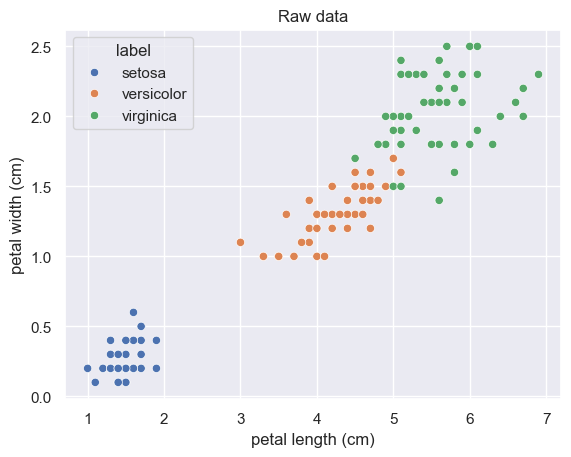

In [4]:
sns.scatterplot(
    iris_df,
    x='petal length (cm)',
    y = 'petal width (cm)',
    hue ='label'
)

plt.title('Raw data')

SELECTING OPTIMAL NUMBER OF CLUSTERS - INERTIA KNEE PLOT (using the elbow curve method)



In [5]:
#Set up multiplt cluster numbers for evaluation
num_clusters = [1, 2, 3, 4, 5, 6, 7]

#List used to store inertia
inertia_list = [] 
#Defining an empty list to store clusters
clustering_result_list = []

#Set up standard scler
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

#Standardise the data
standard_scaler = StandardScaler()
standard_scaler.fit(cluster_data)
cluster_data = standard_scaler.transform(cluster_data)

In [6]:
cluster_data

array([[-1.34022653e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.39706395e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.16971425e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.44707648e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.22655167e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.44707648e+00],
       [-1.51073881e+00, -1.44707648e+00],
       [-1.45390138e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.39706395e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.56757623e+00, -1.31544430e+00],
       [-1.

In [8]:
cluster_data = pd.DataFrame(cluster_data, columns = ['petal length (cm)', 'petal width (cm)'])

#Perform clustering for multiple resolutions

for num_clust in num_clusters:
    
    #Perform clustering for current number of clusters
    kmeans = KMeans(n_clusters=num_clust, n_init='auto')
    kmeans.fit(cluster_data)
    
    #Calculate inertia
    inertia_list.append(kmeans.inertia_)
    
    #Add clustering result to list
    current_clustering = cluster_data.copy()
    current_clustering['clusters'] = kmeans.labels_
    current_clustering['cluster_num'] = num_clust
    clustering_result_list.append(current_clustering)


In [9]:
current_clustering

,petal length (cm),petal width (cm),clusters,cluster_num
0,-1.340227,-1.315444,1,7
1,-1.340227,-1.315444,1,7
2,-1.397064,-1.315444,1,7
3,-1.283389,-1.315444,1,7
4,-1.340227,-1.315444,1,7
...,...,...,...,...
145,0.819596,1.448832,3,7
146,0.705921,0.922303,0,7
147,0.819596,1.053935,0,7
148,0.933271,1.448832,3,7


In [10]:
clustering_result_list

[     petal length (cm)  petal width (cm)  clusters  cluster_num
 0            -1.340227         -1.315444         0            1
 1            -1.340227         -1.315444         0            1
 2            -1.397064         -1.315444         0            1
 3            -1.283389         -1.315444         0            1
 4            -1.340227         -1.315444         0            1
 ..                 ...               ...       ...          ...
 145           0.819596          1.448832         0            1
 146           0.705921          0.922303         0            1
 147           0.819596          1.053935         0            1
 148           0.933271          1.448832         0            1
 149           0.762758          0.790671         0            1
 
 [150 rows x 4 columns],
      petal length (cm)  petal width (cm)  clusters  cluster_num
 0            -1.340227         -1.315444         0            2
 1            -1.340227         -1.315444         0            

In [11]:
#MErge results for all values of num_clust 
merged_clustering_result = pd.concat(clustering_result_list,
                                     axis=0,
                                     ignore_index=True)

In [15]:
# ## Plot all clusterings
# # g = sns.FacetGrid(merged_clustering_result, col='cluster_num', col_wrap=3, hue='clusters')
# g.map(sns.scatterplot('petal length (cm)', 'petal width (cm)', alpha=.7))
# g.add_legend()

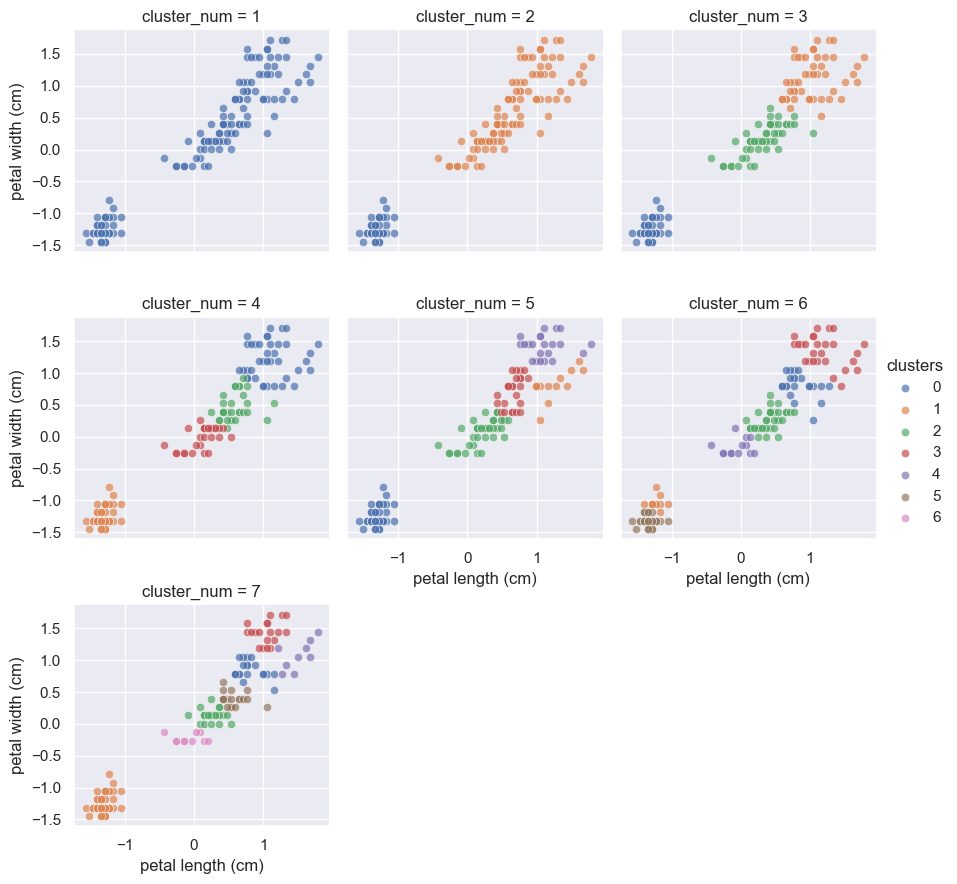

In [14]:
# Initialize the FacetGrid
g = sns.FacetGrid(merged_clustering_result, col='cluster_num', col_wrap=3, hue='clusters')

# Map the scatterplot onto the grid
g.map(sns.scatterplot, 'petal length (cm)', 'petal width (cm)', alpha=.7)

# Add a legend to the plot
g.add_legend()


Using kneedle library for automatic knee detection


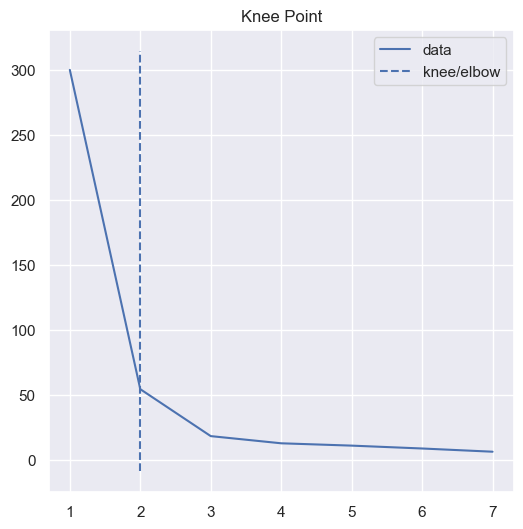

In [16]:
Kneedle = KneeLocator(num_clusters,
                      inertia_list,
                      curve='convex',
                      direction='decreasing')
Kneedle.plot_knee()

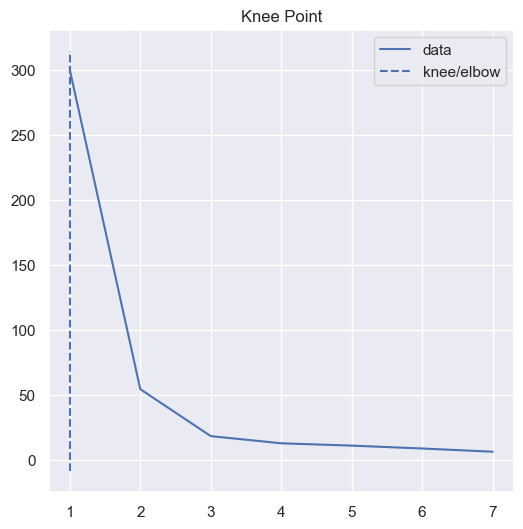

In [19]:
Kneedle = KneeLocator(num_clusters,
                      inertia_list,
                      curve='concave',
                      direction='increasing')
Kneedle.plot_knee()

Using silhouette method to determine the number of clusters


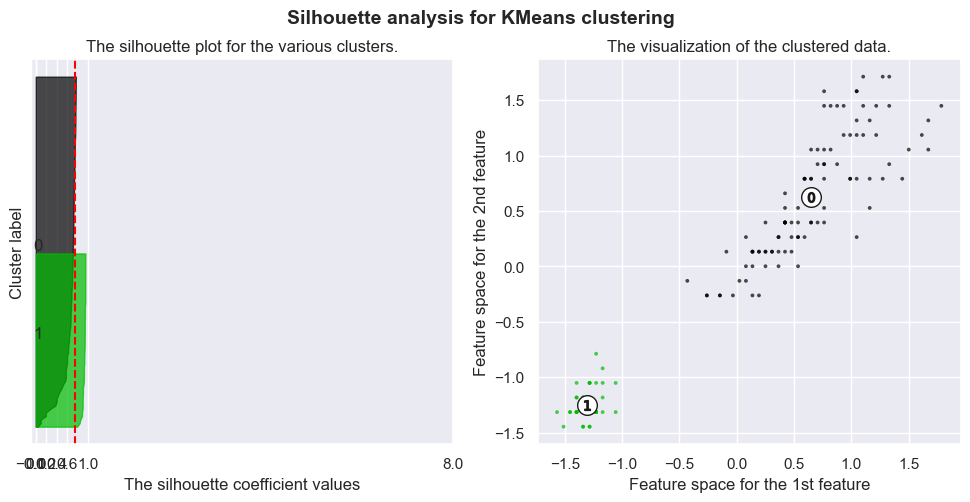

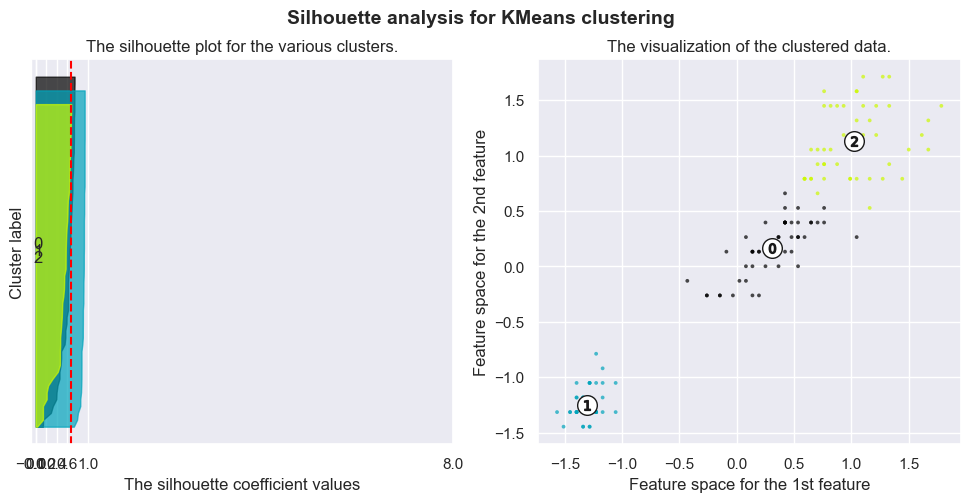

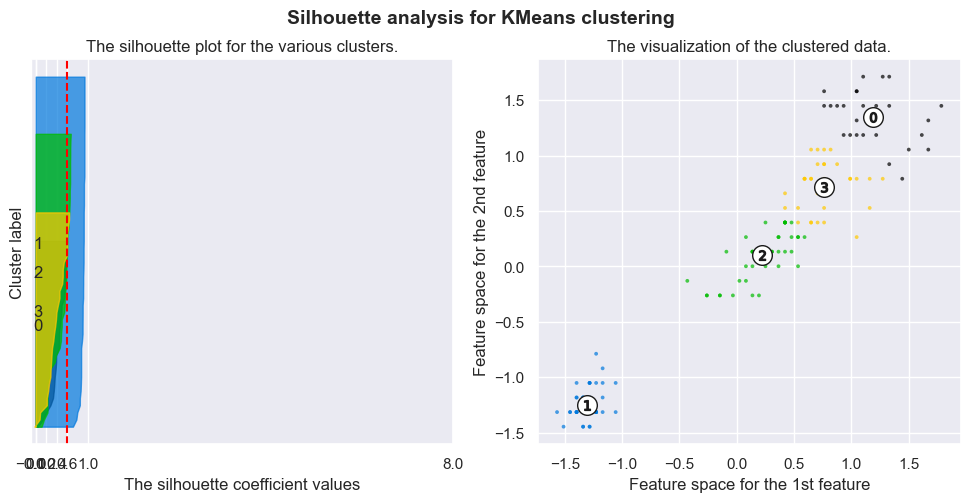

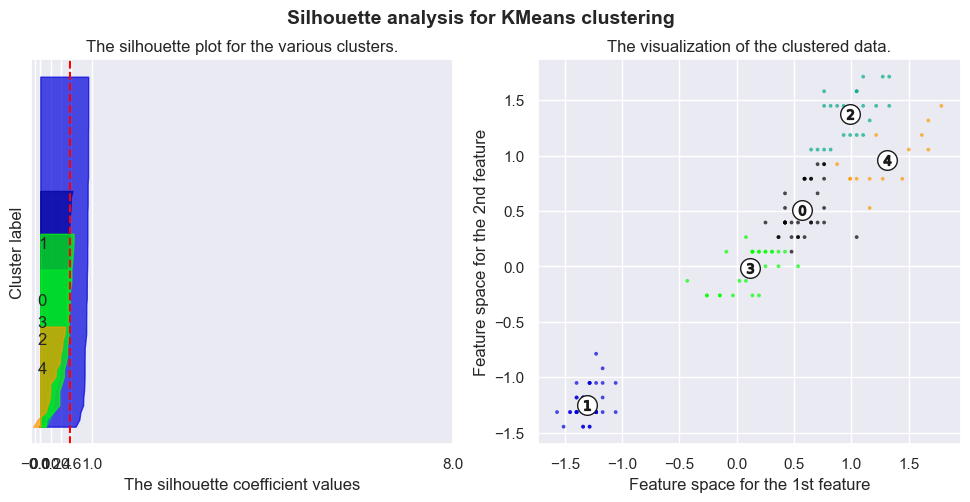

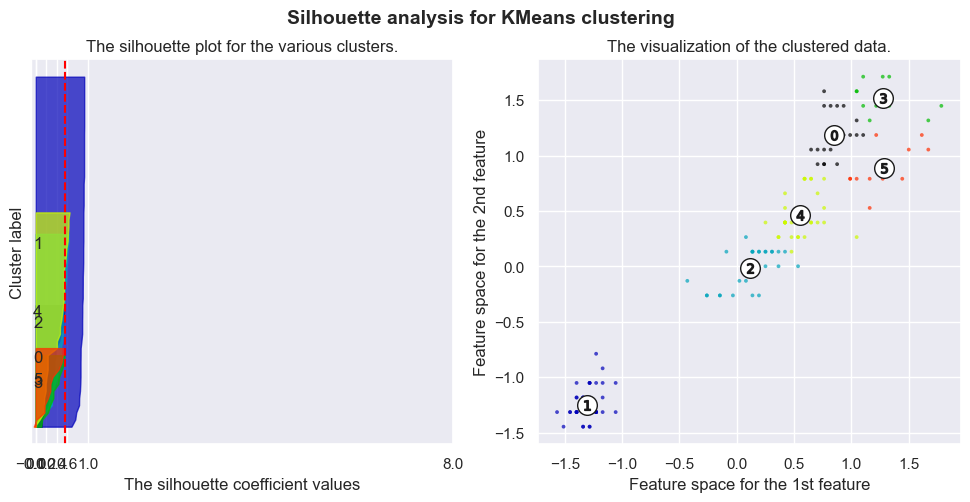

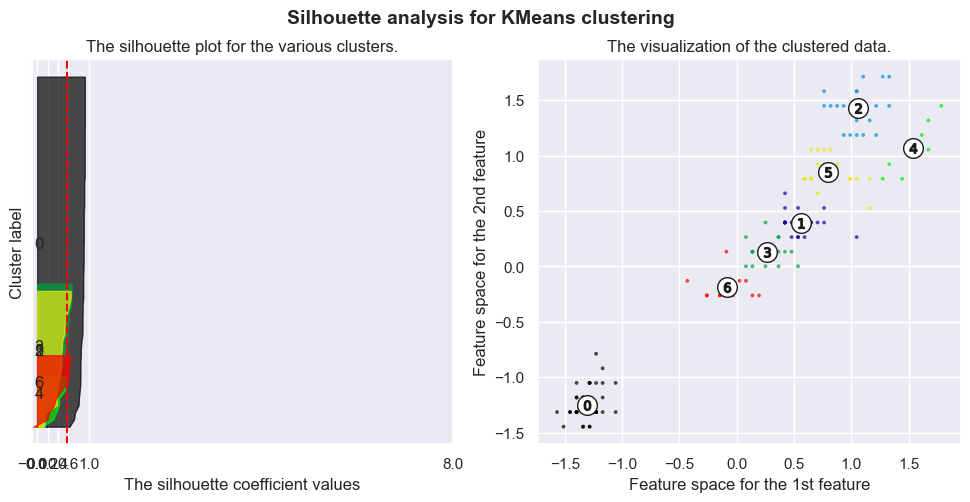

In [23]:
#Set up multiplt cluster numbers for evaluation
# num_clusters = [1, 2, 3, 4, 5, 6, 7]
num_clusters = [2, 3, 4, 5, 6, 7]

#List ufor storing silhouette score
silhouette_score_list = [] 


#Set up standard scler
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

#Standardise the data
standard_scaler = StandardScaler()
standard_scaler.fit(cluster_data)
cluster_data = standard_scaler.transform(cluster_data)

cluster_data = pd.DataFrame(cluster_data, columns = ['petal length (cm)', 'petal width (cm)'])

#Perform clustering for multiple resolutions

#Lower y coordinate for the first sihouette plot
y_lower = 10

for num_clust in num_clusters:
    
    #Perform clustering for current number of clusters
    kmeans = KMeans(n_clusters=num_clust, n_init='auto')
    kmeans.fit(cluster_data)
    
    #Calculate average silhouette score
    silhouette_scr = silhouette_score(cluster_data, kmeans.labels_)
    silhouette_score_list.append(silhouette_scr)
    
    #Calculate silhouette score for each data point
    sample_silhouette_values = silhouette_samples(cluster_data, kmeans.labels_)
    
    #Plot clustering and silhouettes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot silhouette scores for points belonging to each cluster
    for clust_i in range(num_clust):
        
        #Get points bellonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == clust_i]
        
        #Sort points by silhouette value
        ith_cluster_silhouette_values.sort()
        
        #Get size of current cluster 
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        #Get upper value of y coordinate for current cluster 
        y_upper = y_lower + size_cluster_i
        
        ### Fill values between y_lower and y_upper with silhouette score value for data points
        color = cm.nipy_spectral(float(clust_i) / num_clust)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7
        )
        
        ## Label the silhouette plots with their cluster numbers at the middle 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(clust_i))
        
    ### Set title and labels silhouette subplot 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    #The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_scr, color='red', linestyle='--')
    
    #Clear the y axis labels / ticks
    ax1.set_yticks([])
    #Set x-ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0, 8, 1])
    
    ## Map cluster labels to cluster colors, nipy_spectral provides colors evenly distributed accross the entire range of values.
    colors = cm.nipy_spectral(kmeans.labels_.astype(float) / num_clust)
    
    # 2nd plot showing the actual clusters formed
    ax2.scatter(
        cluster_data.values[:, 0],
        cluster_data.values[:, 1],
        marker=".", s = 30, lw=0,
        alpha = 0.7, c=colors,
        edgecolor="k"
    )
    
    #Get cluster centers
    centers = kmeans.cluster_centers_
    
    #Draw white circles at cluster centers 
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
        
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, s=50, edgecolor="k")
    # Set title and labels for scatterplot 
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    #Add the main title 
    plt.suptitle(
        "Silhouette analysis for KMeans clustering",
        fontsize=14,
        fontweight='bold'
    )
    
    plt.show()
    


The more correct one

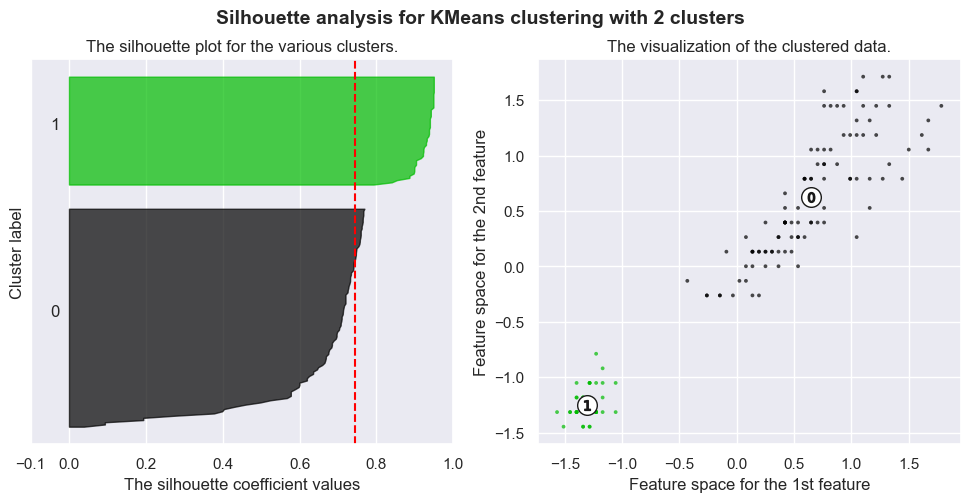

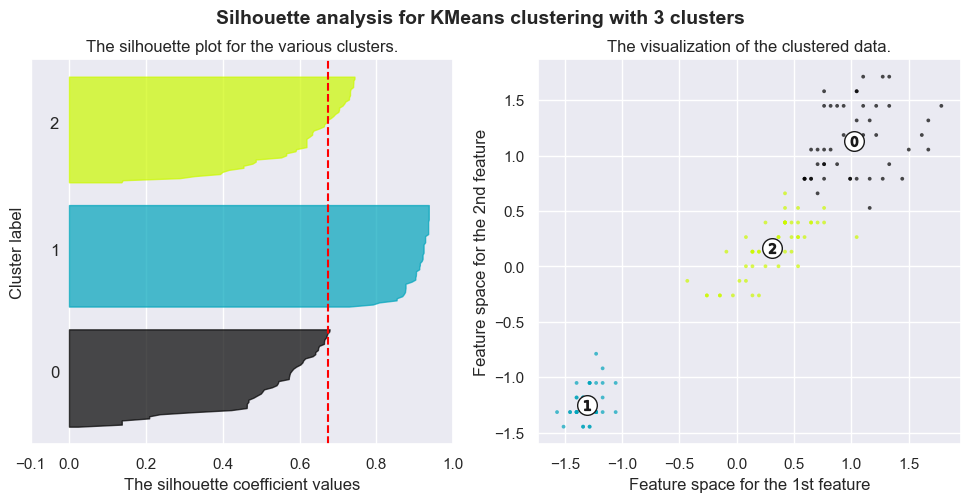

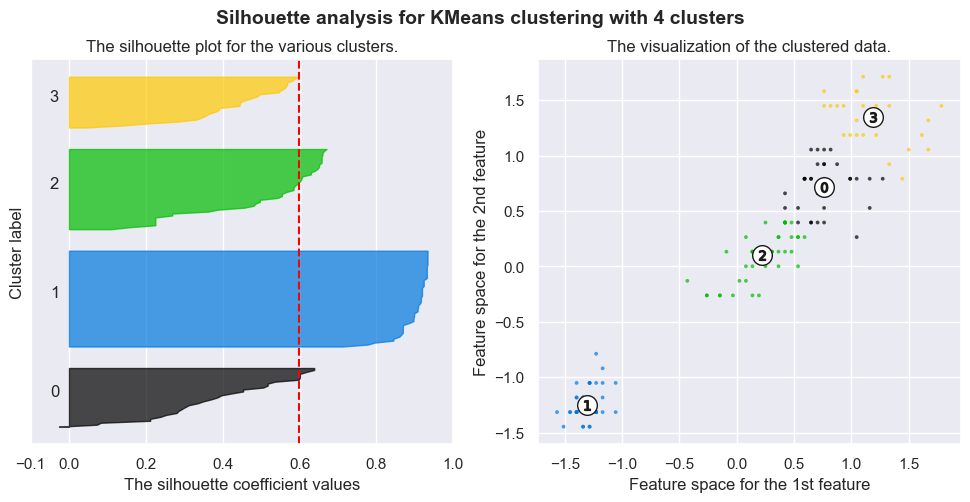

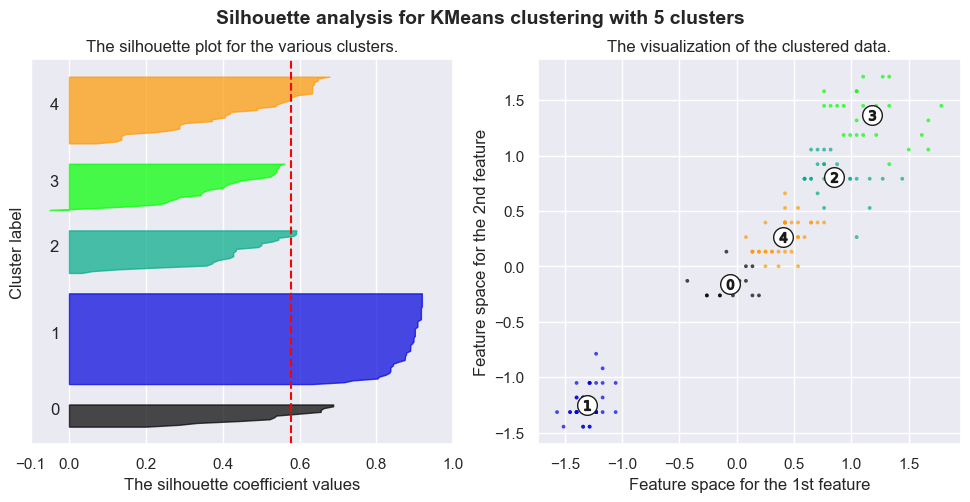

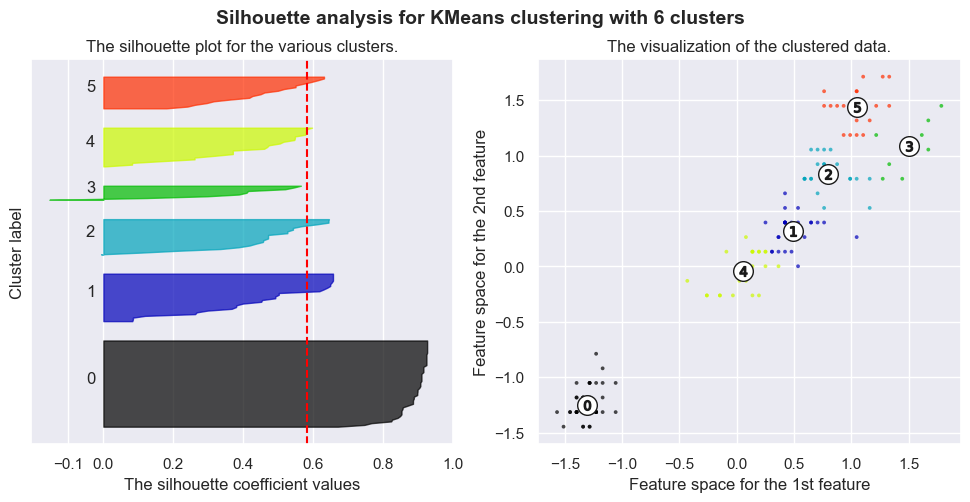

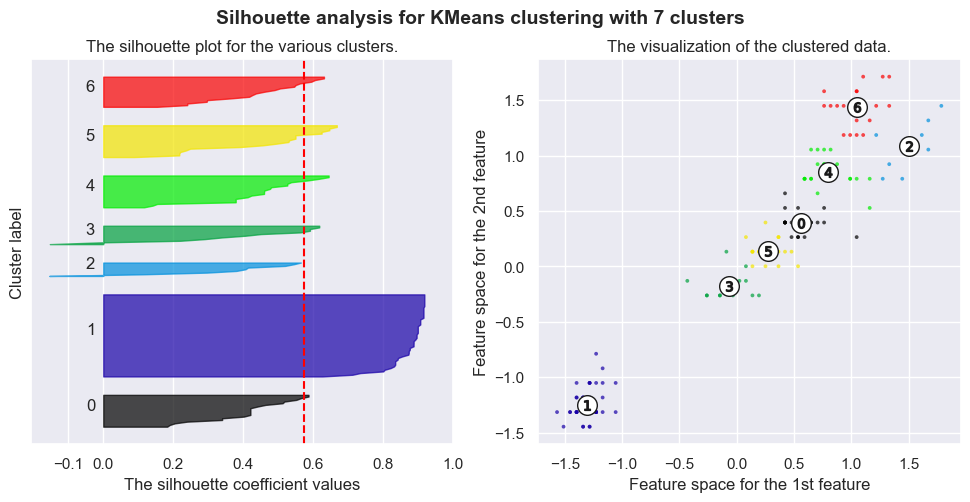

In [24]:
# Set up multiple cluster numbers for evaluation (start from 2)
num_clusters = [2, 3, 4, 5, 6, 7]

# List for storing silhouette scores
silhouette_score_list = [] 

# Set up standard scaler
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

# Standardize the data
standard_scaler = StandardScaler()
standard_scaler.fit(cluster_data)
cluster_data = standard_scaler.transform(cluster_data)

cluster_data = pd.DataFrame(cluster_data, columns=['petal length (cm)', 'petal width (cm)'])

# Perform clustering for multiple resolutions
y_lower = 10  # Lower y-coordinate for the first silhouette plot

for num_clust in num_clusters:
    # Perform clustering for current number of clusters
    kmeans = KMeans(n_clusters=num_clust, n_init='auto')
    kmeans.fit(cluster_data)
    
    # Calculate average silhouette score
    silhouette_scr = silhouette_score(cluster_data, kmeans.labels_)
    silhouette_score_list.append(silhouette_scr)
    
    # Calculate silhouette score for each data point
    sample_silhouette_values = silhouette_samples(cluster_data, kmeans.labels_)
    
    # Plot clustering and silhouettes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot silhouette scores for points belonging to each cluster
    for clust_i in range(num_clust):
        # Get points belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == clust_i]
        
        # Sort points by silhouette value
        ith_cluster_silhouette_values.sort()
        
        # Get size of current cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        # Get upper value of y-coordinate for current cluster
        y_upper = y_lower + size_cluster_i
        
        # Fill values between y_lower and y_upper with silhouette score value for data points
        color = cm.nipy_spectral(float(clust_i) / num_clust)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7
        )
        
        # Label the silhouette plots with their cluster numbers at the middle 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(clust_i))
        y_lower = y_upper + 10  # Update y_lower for the next cluster
    
    # Set title and labels for silhouette subplot
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all values
    ax1.axvline(x=silhouette_scr, color='red', linestyle='--')
    ax1.set_yticks([])  # Clear the y-axis labels/ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])  # Set x-ticks
    
    # Map cluster labels to cluster colors
    colors = cm.nipy_spectral(kmeans.labels_.astype(float) / num_clust)
    
    # 2nd plot showing the actual clusters formed
    ax2.scatter(
        cluster_data.values[:, 0],
        cluster_data.values[:, 1],
        marker=".", s=30, lw=0,
        alpha=0.7, c=colors, edgecolor="k"
    )
    
    # Get cluster centers
    centers = kmeans.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k"
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, s=50, edgecolor="k")
    
    # Set title and labels for scatterplot
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    # Add the main title
    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with {num_clust} clusters",
        fontsize=14, fontweight='bold'
    )
    
    plt.show()


Plotting the silhouette

Text(0, 0.5, 'Silhouette score value')

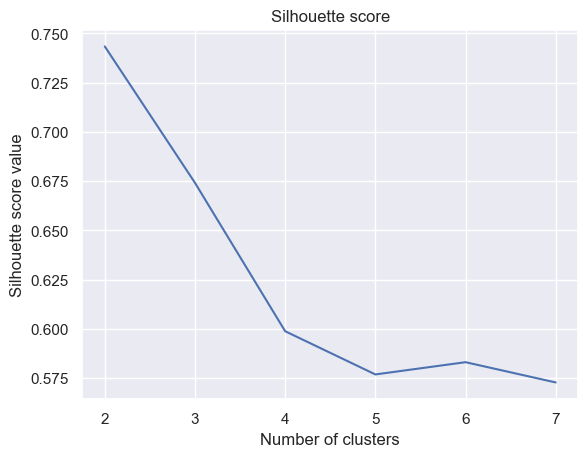

In [25]:
plt.plot(num_clusters, silhouette_score_list)
plt.title('Silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score value')

PERFORMING CLUSTERING ANALYSIS ON ARTIFICIAL DATASET


In [26]:
from sklearn.datasets import make_blobs 

X, y_true = make_blobs(
    n_samples=500, centers=5, cluster_std=0.60, random_state=1
)

In [27]:
X

array([[ -2.06195728,   4.63302814],
       [ -2.19344282,   1.38908356],
       [ -6.84534132,  -3.51139566],
       [ -7.42557626,  -7.819584  ],
       [ -7.20896071,  -3.45625074],
       [ -9.6246304 ,  -4.31323127],
       [ -1.92783704,   5.14119449],
       [ -2.32757068,   0.88765605],
       [-10.25142668,  -3.9014699 ],
       [ -7.05458335,  -8.41071347],
       [ -6.83091894,  -3.1982377 ],
       [ -6.08745256,  -3.20477844],
       [ -1.87384194,   0.24217175],
       [ -1.63423166,   4.756179  ],
       [ -9.90395419,  -4.06748116],
       [ -9.73999682,  -4.31754759],
       [ -6.45815795,  -9.0391657 ],
       [ -6.7556339 ,  -8.82215074],
       [ -0.97929824,   3.74655511],
       [ -2.51804817,   1.88719742],
       [-10.57096766,  -3.60180229],
       [ -1.8279937 ,   1.21164822],
       [ -6.63080202,  -2.7826009 ],
       [ -1.62907525,   4.02429248],
       [ -1.251518  ,   4.21460891],
       [ -2.56864386,  -0.60258885],
       [ -8.17919824,  -3.45859777],
 

In [28]:
y_true

array([0, 4, 3, 2, 3, 1, 0, 4, 1, 2, 3, 3, 4, 0, 1, 1, 2, 2, 0, 4, 1, 4,
       3, 0, 0, 4, 1, 1, 3, 4, 4, 2, 3, 4, 4, 1, 2, 0, 0, 2, 1, 1, 1, 4,
       3, 3, 3, 1, 4, 4, 1, 2, 2, 3, 3, 0, 1, 2, 3, 2, 2, 0, 0, 1, 3, 0,
       0, 4, 1, 0, 2, 3, 1, 4, 2, 4, 2, 1, 4, 4, 3, 1, 0, 1, 3, 0, 2, 0,
       0, 3, 4, 0, 3, 2, 1, 4, 3, 1, 4, 4, 0, 3, 4, 1, 4, 3, 4, 1, 0, 0,
       1, 2, 2, 0, 2, 0, 1, 0, 4, 0, 1, 4, 2, 1, 1, 4, 1, 0, 4, 2, 4, 0,
       1, 1, 4, 2, 3, 1, 4, 0, 1, 3, 2, 2, 0, 0, 0, 4, 3, 3, 3, 2, 1, 0,
       4, 1, 2, 1, 4, 4, 2, 1, 2, 1, 1, 0, 2, 2, 1, 4, 0, 2, 1, 4, 4, 0,
       1, 2, 1, 1, 3, 2, 4, 1, 0, 3, 2, 2, 4, 3, 2, 3, 0, 1, 2, 4, 3, 0,
       3, 3, 4, 0, 3, 2, 1, 3, 3, 2, 4, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 0,
       2, 0, 4, 2, 2, 4, 2, 1, 1, 1, 2, 0, 3, 1, 4, 1, 0, 1, 2, 4, 0, 4,
       4, 1, 3, 3, 3, 3, 4, 1, 3, 1, 4, 0, 0, 4, 4, 0, 1, 4, 2, 1, 4, 0,
       1, 1, 0, 4, 3, 3, 2, 2, 1, 4, 0, 0, 4, 0, 2, 4, 0, 3, 0, 2, 3, 0,
       3, 0, 0, 3, 2, 2, 1, 4, 4, 3, 3, 0, 4, 1, 2,

In [29]:
artificial_df = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])
artificial_df

,Feature 1,Feature 2
0,-2.061957,4.633028
1,-2.193443,1.389084
2,-6.845341,-3.511396
3,-7.425576,-7.819584
4,-7.208961,-3.456251
...,...,...
495,-7.411956,-3.034948
496,-1.236796,1.137805
497,-1.362433,4.301668
498,-10.048417,-4.131766


<Axes: xlabel='Feature 1', ylabel='Feature 2'>

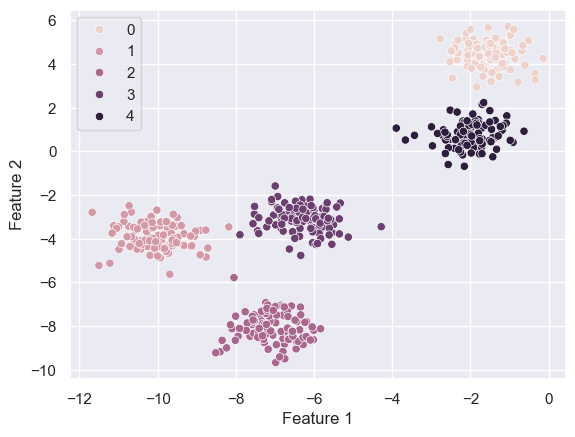

In [30]:
sns.scatterplot(artificial_df, x='Feature 1', y = 'Feature 2', hue=y_true)

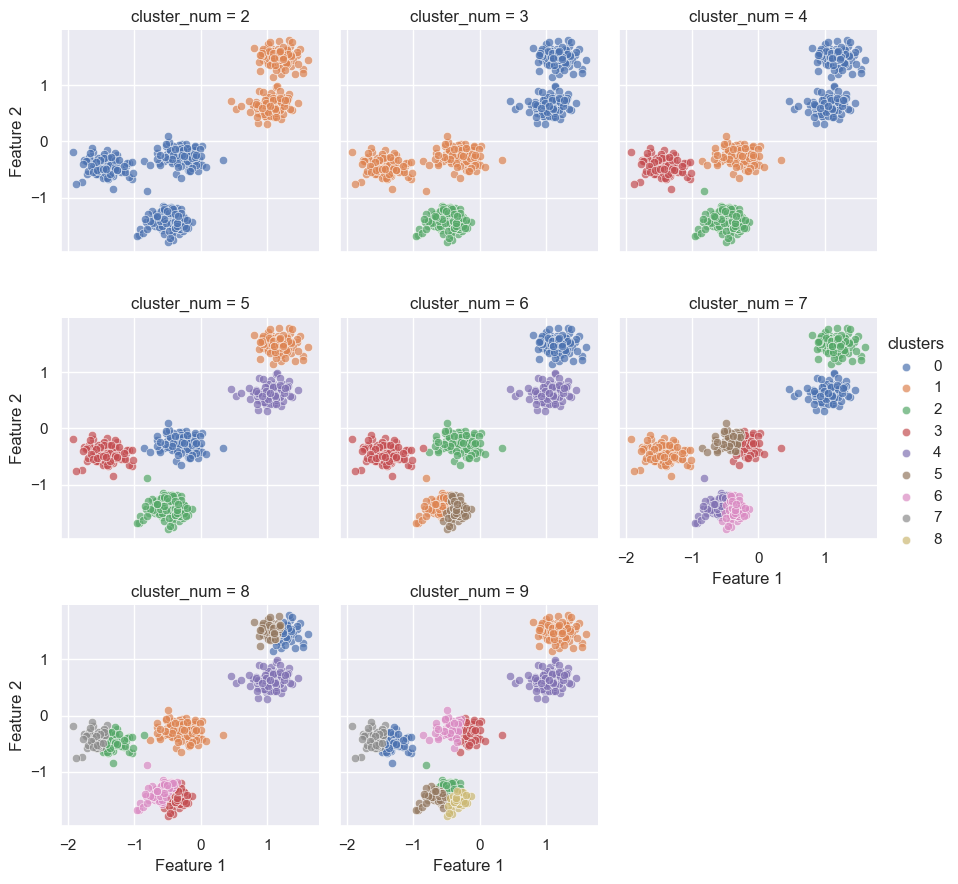

In [31]:
#PErforming the clustering 

#Different numbers of clusters to try out 
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

#Storage for inertia value 
inertia_list = [] 
# An empty list to store silhouette values
silhouette_store_list = []

#Defining an empty list to store clusterings 
clustering_result_list = []

#Use StandardScaler to standardize data 
standard_scaler = StandardScaler()
artificial_df = standard_scaler.fit_transform(artificial_df)
artificial_df = pd.DataFrame(
    data=artificial_df,
    columns=['Feature 1', 'Feature 2']
)

#Perform clustering for different number of clusters 
for num_clust in num_clusters:
    
    #Perform k means clustering 
    kmeans = KMeans(n_clusters=num_clust, n_init='auto') 
    kmeans.fit(artificial_df)
    
    #Calculate and store inertia and silhouette score 
    inertia_list.append(kmeans.inertia_)
    silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
    silhouette_store_list.append(silhouette_scr)
    
    #Add clustering result to list 
    current_clustering = artificial_df.copy()
    current_clustering['clusters'] = kmeans.labels_ 
    current_clustering['cluster_num'] = num_clust 
    clustering_result_list.append(current_clustering)
    
#Merge results for all values of num_clust 
merged_clustering_result = pd.concat(clustering_result_list, axis=0, ignore_index=True)

#Plot all clusterings 
g = sns.FacetGrid(
    merged_clustering_result, col='cluster_num', 
    col_wrap=3,
    hue='clusters'
)
g.map(sns.scatterplot,
      'Feature 1', 'Feature 2',
      alpha=.7)

g.add_legend()
    

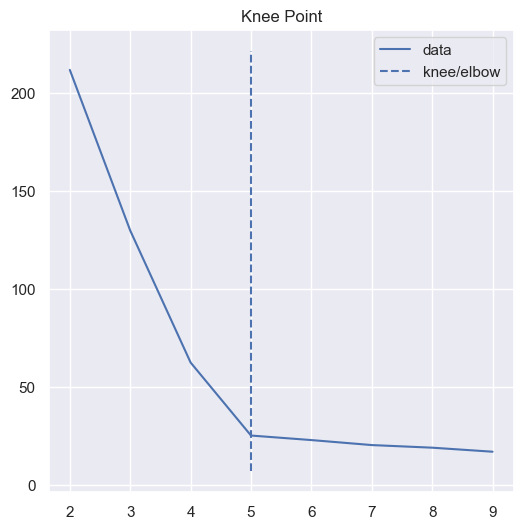

In [32]:
#Plot inertia plot and curve 
kneedle = KneeLocator(
    num_clusters, inertia_list, curve='convex',direction='decreasing'
)

kneedle.plot_knee()

ValueError: x and y must have same first dimension, but have shapes (8,) and (6,)

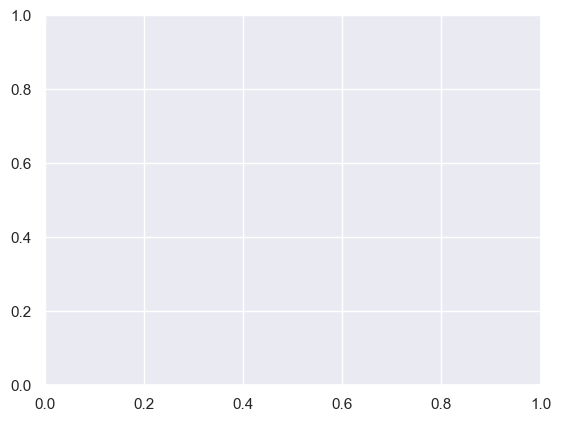

In [ ]:
#PErforming the clustering 

#Different numbers of clusters to try out 
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

#Storage for inertia value 
inertia_list = [] 
# An empty list to store silhouette values
silhouette_store_list = []

#Defining an empty list to store clusterings 
clustering_result_list = []

#Use StandardScaler to standardize data 
standard_scaler = StandardScaler()
artificial_df = standard_scaler.fit_transform(artificial_df)
artificial_df = pd.DataFrame(
    data=artificial_df,
    columns=['Feature 1', 'Feature 2']
)

#Perform clustering for different number of clusters 
for num_clust in num_clusters:
    
    #Perform k means clustering 
    kmeans = KMeans(n_clusters=num_clust, n_init='auto') 
    kmeans.fit(artificial_df)
    
    #Calculate and store inertia and silhouette score 
    inertia_list.append(kmeans.inertia_)
    silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
    silhouette_store_list.append(silhouette_scr)
    
    #Add clustering result to list 
    current_clustering = artificial_df.copy()
    current_clustering['clusters'] = kmeans.labels_ 
    current_clustering['cluster_num'] = num_clust 
    clustering_result_list.append(current_clustering)
    
#Merge results for all values of num_clust 
merged_clustering_result = pd.concat(clustering_result_list, axis=0, ignore_index=True)

#Plot all clusterings 
g = sns.FacetGrid(
    merged_clustering_result, col='cluster_num', 
    col_wrap=3,
    hue='clusters'
)
g.map(sns.scatterplot,
      'Feature 1', 'Feature 2',
      alpha=.7)

g.add_legend()
    

plt.plot(num_clusters, silhouette_score_list)

In [34]:
print(len(num_clusters), len(silhouette_store_list))


8 8


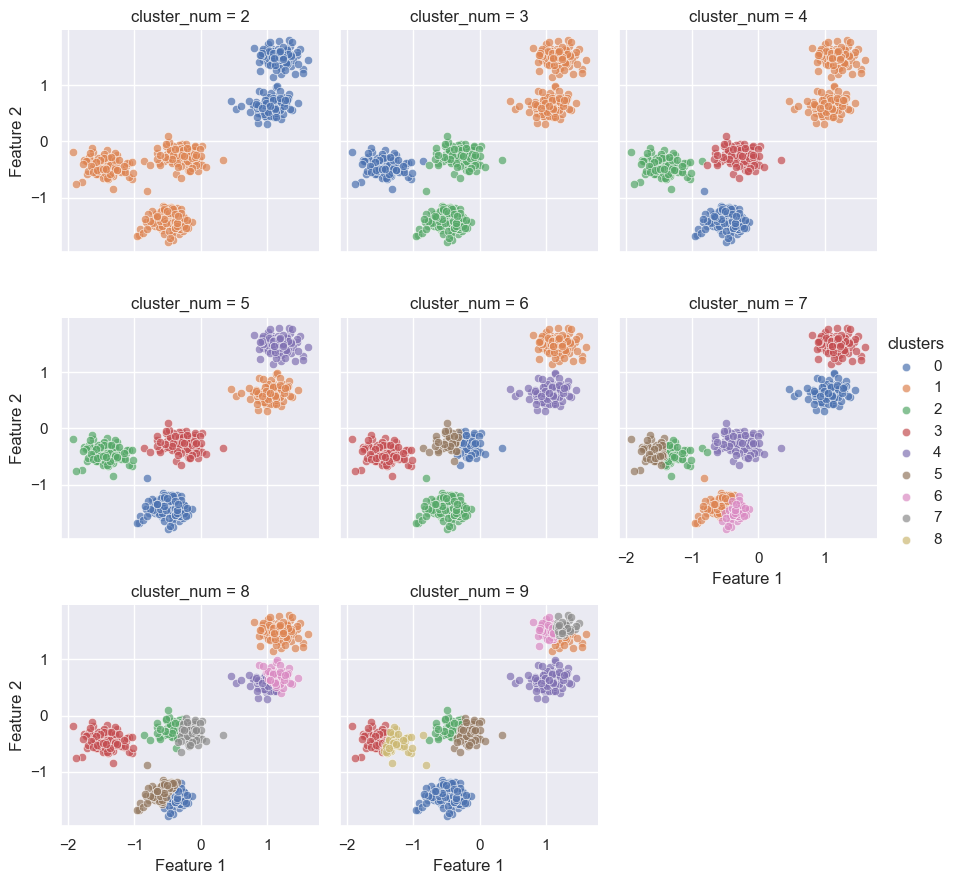

In [45]:
# Different numbers of k to try out
num_clusters = [2,3,4,5,6,7,8,9]
# Storage for inertia value
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []
# List used to store clustering results
clustering_result_list = []

# Use StandardScaler to standardize data
standard_scaler = StandardScaler()
artificial_df = standard_scaler.fit_transform(artificial_df)
artificial_df = pd.DataFrame(
    data=artificial_df, 
    columns=['Feature 1', 'Feature 2']
)

# Perform clustering for different number of clusters
for num_clust in num_clusters:
    
    # Perform k means clustering
    kmeans = KMeans(n_clusters=num_clust, n_init='auto')
    kmeans.fit(artificial_df)
    
    # Calculate and store inertia & silhouette score
    inertia_list.append(kmeans.inertia_)
    silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
    silhouette_score_list.append(silhouette_scr)
    
    # Add clustering result to list
    current_clustering = artificial_df.copy()
    current_clustering['clusters'] = kmeans.labels_
    current_clustering['cluster_num'] = num_clust
    clustering_result_list.append(current_clustering)
    
# Merge results for all values of num_clust
merged_clustering_result = pd.concat(
    clustering_result_list, 
    axis=0, 
    ignore_index=True
)

# Plot all clusterings
g = sns.FacetGrid(
    merged_clustering_result, 
    col="cluster_num", 
    col_wrap=3, 
    hue="clusters"
)
g.map(
    sns.scatterplot, 
    'Feature 1', 
    'Feature 2', 
    alpha=.7
)
g.add_legend()    

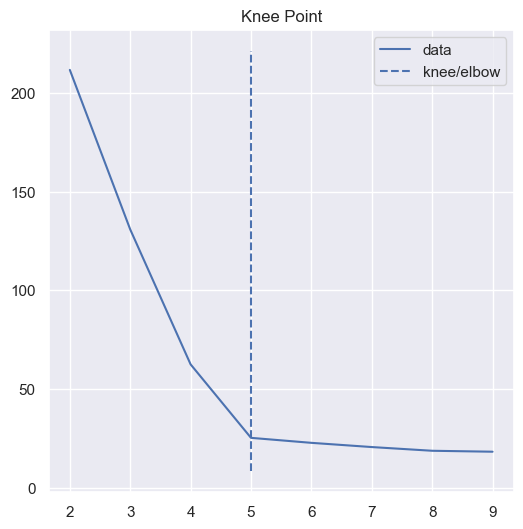

In [46]:
# Plot inertia
kneedle = KneeLocator(
    num_clusters, 
    inertia_list, 
    curve="convex", 
    direction="decreasing"
)
kneedle.plot_knee()

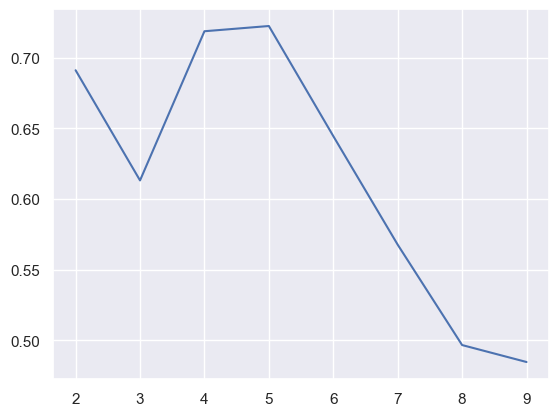

In [47]:
plt.plot(num_clusters, silhouette_score_list)

In [48]:
#Based on  the knee plot and the silhouette plot, we should select 5 clusters

CASE STUDY - 2

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

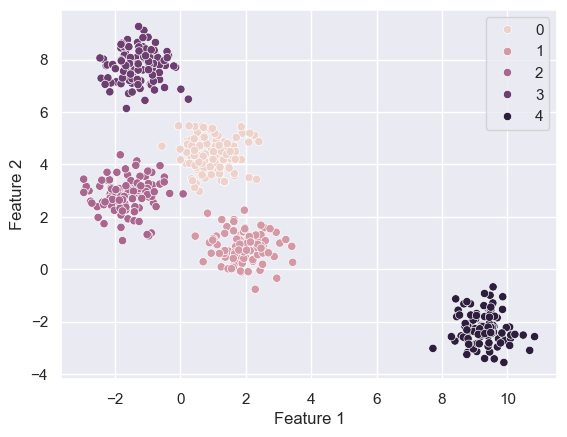

In [49]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(
    n_samples=500, centers=5, cluster_std=0.6, random_state=0
)

artificial_df = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])

sns.scatterplot(artificial_df, x='Feature 1', y='Feature 2', hue=y_true)

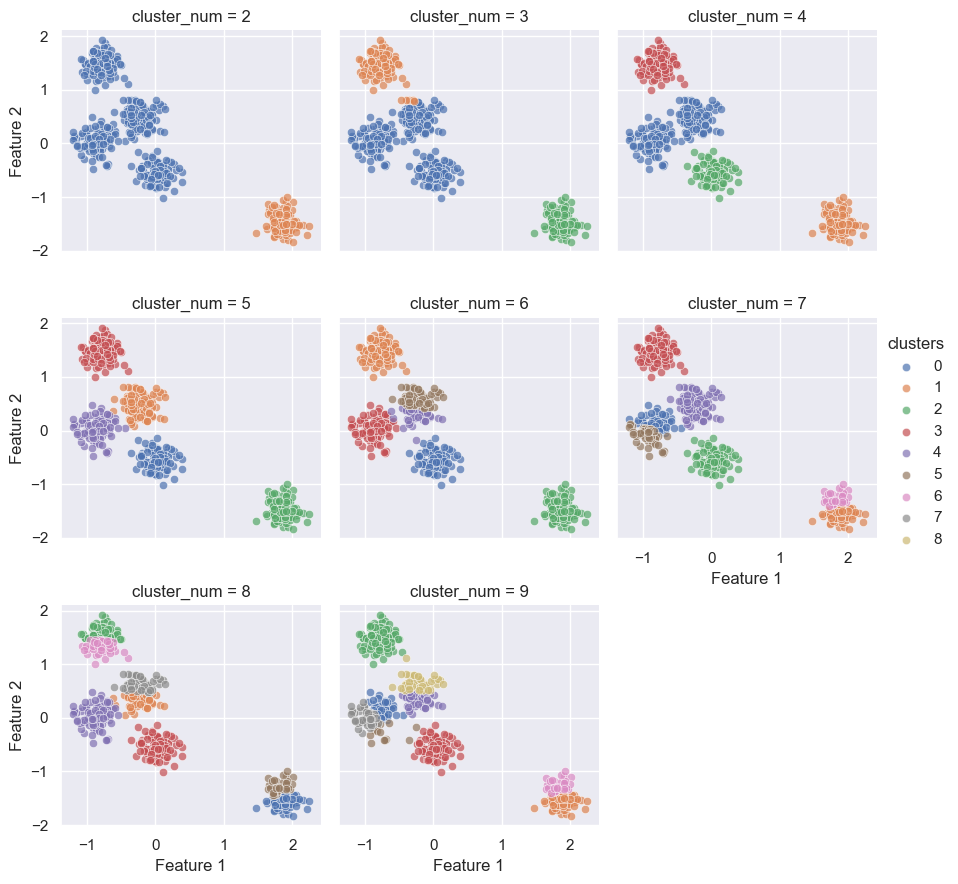

In [50]:
# Various number of clusters
num_clusters = [2,3,4,5,6,7,8,9]
# List to store inertia values
inertia_list = []
# List to store silhouette scores
silhouette_score_list = []

# List used to store clusterings
clustering_result_list = []

# Use StandardScaler to standardize data
standard_scaler = StandardScaler()
artificial_df = standard_scaler.fit_transform(artificial_df)
artificial_df = pd.DataFrame(
    data=artificial_df, 
    columns=['Feature 1', 'Feature 2']
)

# Perform clustering for different number of clusters
for num_clust in num_clusters:
    
    # Perform k means clustering
    kmeans = KMeans(n_clusters=num_clust, n_init='auto')
    kmeans.fit(artificial_df)
    
    # Calculate and store inertia & silhouette score
    inertia_list.append(kmeans.inertia_)
    silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
    silhouette_score_list.append(silhouette_scr)
    
    # Add clustering result to the list
    current_clustering = artificial_df.copy()
    current_clustering['clusters'] = kmeans.labels_
    current_clustering['cluster_num'] = num_clust
    clustering_result_list.append(current_clustering)
    
# Merge results for all values of num_clust
merged_clustering_result = pd.concat(
    clustering_result_list, 
    axis=0, 
    ignore_index=True
)

# Plot all clusterings
g = sns.FacetGrid(
    merged_clustering_result, 
    col="cluster_num", 
    col_wrap=3, 
    hue="clusters"
)
g.map(
    sns.scatterplot, 
    'Feature 1', 
    'Feature 2', 
    alpha=.7
)
g.add_legend()    

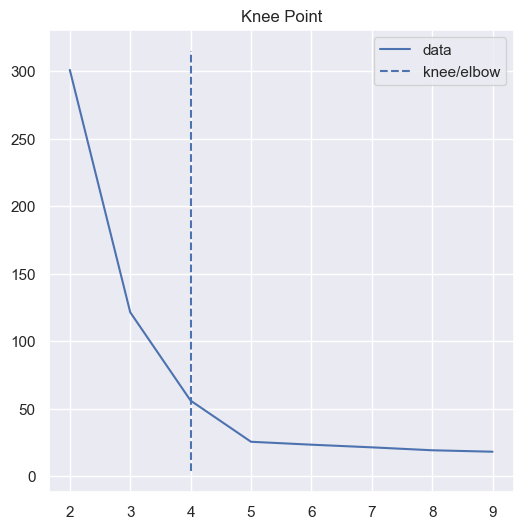

In [51]:
# Plot inertia plot and curve
kneedle = KneeLocator(
    num_clusters, 
    inertia_list, 
    S=2, 
    curve="convex", 
    direction="decreasing"
)
kneedle.plot_knee()

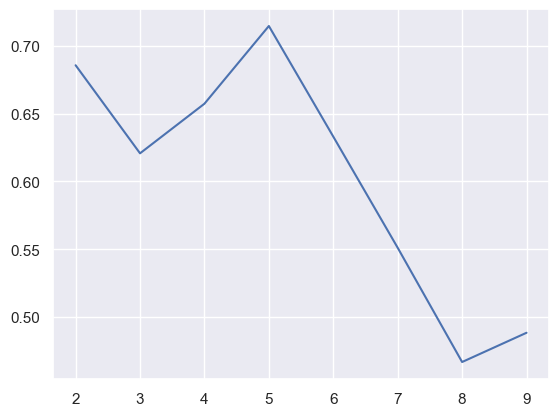

In [52]:
plt.plot(num_clusters, silhouette_score_list)